In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#CONSTANTS
pi = np.pi

In [3]:
#INPUTS FOR RESONATOR
wavelength = 0.532
n = 1.0

In [4]:
#DEFINE FUNCTIONS
#---------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------
def Mat_FS(distance):
    ABCD_matrix1 = np.array([[1, distance*1000],[0,1]])
    
    return ABCD_matrix1

#---------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------
def Mat_Lens(Focal_length):
    Focal_length = Focal_length * 1000
    ABCD_matrix2 = np.array([[1, 0], [-1/Focal_length, 1]])
    
    return ABCD_matrix2

#---------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------
def resonator_params(distance1, f_lens1, distance2, f_lens2, distance3, f_lens3, distance4):
    L2R_matrix = Mat_FS(distance4)@Mat_Lens(f_lens3)@Mat_FS(distance3)@Mat_Lens(f_lens2)@Mat_FS(distance2)@Mat_Lens(f_lens1)@Mat_FS(distance1)
    R2L_matrix = Mat_FS(distance1)@Mat_Lens(f_lens1)@Mat_FS(distance2)@Mat_Lens(f_lens2)@Mat_FS(distance3)@Mat_Lens(f_lens3)@Mat_FS(distance4)
    RT_matrix = R2L_matrix @ L2R_matrix
    
    #Calculate stability
    tr = np.trace(RT_matrix)
    g = (tr+2)/4
    
    #Calculate the Beam-waist at the start of the cavity
    imag = 1- (tr*tr/4)
    imag = np.sqrt(imag)
    Inv_q0_imag = imag/RT_matrix[0,1]
    width1 = np.sqrt(wavelength/(pi*n*Inv_q0_imag))
    Inv_q0_real = (RT_matrix[1,1] - RT_matrix[0,0])/(2*RT_matrix[0,1])
    Inv_q0 = Inv_q0_real - (Inv_q0_imag)*1j
    
    #Calculate the Beam-waist at the end of the cavity
    Inv_q1 = (L2R_matrix[1,0] + L2R_matrix[1,1]*Inv_q0)/(L2R_matrix[0,0]+L2R_matrix[0,1]*Inv_q0)
    width2 = np.abs(wavelength/(pi*n*np.imag(Inv_q1)))
    width2 = np.sqrt(width2)
    
    #Calculate the frequency of the resonator
    frequency = 0.5*3e8*1000/(distance1+distance2+distance3+distance4)
    
    return g, width1, width2, frequency


#---------------------------------------------------------------------------------------------------------------------------------------
def resonator_plotter(distance1, f_lens1, distance2, f_lens2, distance3, f_lens3, distance4,interval):
    L2R_matrix = Mat_FS(distance4)@Mat_Lens(f_lens3)@Mat_FS(distance3)@Mat_Lens(f_lens2)@Mat_FS(distance2)@Mat_Lens(f_lens1)@Mat_FS(distance1)
    R2L_matrix = Mat_FS(distance1)@Mat_Lens(f_lens1)@Mat_FS(distance2)@Mat_Lens(f_lens2)@Mat_FS(distance3)@Mat_Lens(f_lens3)@Mat_FS(distance4)
    RT_matrix = R2L_matrix @ L2R_matrix
    
    #Calculate stability
    tr = np.trace(RT_matrix)

    
    #Calculate the Beam-waist at the start of the cavity
    imag = 1- (tr*tr/4)
    imag = np.sqrt(imag)
    Inv_q0_imag = imag/RT_matrix[0,1]
    width1 = np.sqrt(wavelength/(pi*n*Inv_q0_imag))
    Inv_q0_real = (RT_matrix[1,1] - RT_matrix[0,0])/(2*RT_matrix[0,1])
    Inv_q0 = Inv_q0_real - (Inv_q0_imag)*1j
    
    
    iq = np.array([Inv_q0])
    z = np.array([0])
    
    Prop_matrix = Mat_FS(interval)
    A = Prop_matrix[0,0]
    B = Prop_matrix[0,1]
    C = Prop_matrix[1,0]
    D = Prop_matrix[1,1]
    
    for i in range(distance1):
        iq = np.append(iq, (C + iq[-1]*D)/(A + iq[-1]*B))
        z = np.append(z, z[-1]+interval)
        
    ThinLens_matrix1 = Mat_Lens(f_lens1)
    A1 = ThinLens_matrix1[0,0]
    B1 = ThinLens_matrix1[0,1]
    C1 = ThinLens_matrix1[1,0]
    D1 = ThinLens_matrix1[1,1]
    iq[-1] = (C1 + iq[-1]*D1)/(A1 + iq[-1]*B1)
    
    for i in range(distance2):
        iq = np.append(iq, (C + iq[-1]*D)/(A + iq[-1]*B))
        z = np.append(z, z[-1]+interval)
        
    ThinLens_matrix1 = Mat_Lens(f_lens2)
    A1 = ThinLens_matrix1[0,0]
    B1 = ThinLens_matrix1[0,1]
    C1 = ThinLens_matrix1[1,0]
    D1 = ThinLens_matrix1[1,1]
    iq[-1] = (C1 + iq[-1]*D1)/(A1 + iq[-1]*B1)
    
    for i in range(distance3):
        iq = np.append(iq, (C + iq[-1]*D)/(A + iq[-1]*B))
        z = np.append(z, z[-1]+interval)
        
    ThinLens_matrix1 = Mat_Lens(f_lens3)
    A1 = ThinLens_matrix1[0,0]
    B1 = ThinLens_matrix1[0,1]
    C1 = ThinLens_matrix1[1,0]
    D1 = ThinLens_matrix1[1,1]
    iq[-1] = (C1 + iq[-1]*D1)/(A1 + iq[-1]*B1)
    
    for i in range(distance4):
        iq = np.append(iq, (C + iq[-1]*D)/(A + iq[-1]*B))
        z = np.append(z, z[-1]+interval)
    
    w = np.sqrt(wavelength/(-1*pi*n*np.imag(iq)))

    plt.figure(figsize=(14,10),tight_layout = True)
    plt.plot(z, w, label="top", color="blue", linewidth=4)
    plt.plot(z, -1*w, label="top", color="blue", linewidth=4)
    plt.xlim(0,z[-1])
    plt.ylim(-1500,1500)
    plt.grid(True)
     
    return 





Stability =  0.02292815829333339
Beam Waist OC = 105.01668688317586 um
Beam Waist SAM = 70.36970114111644 um
Frequency = 66.72597864768683 MHz


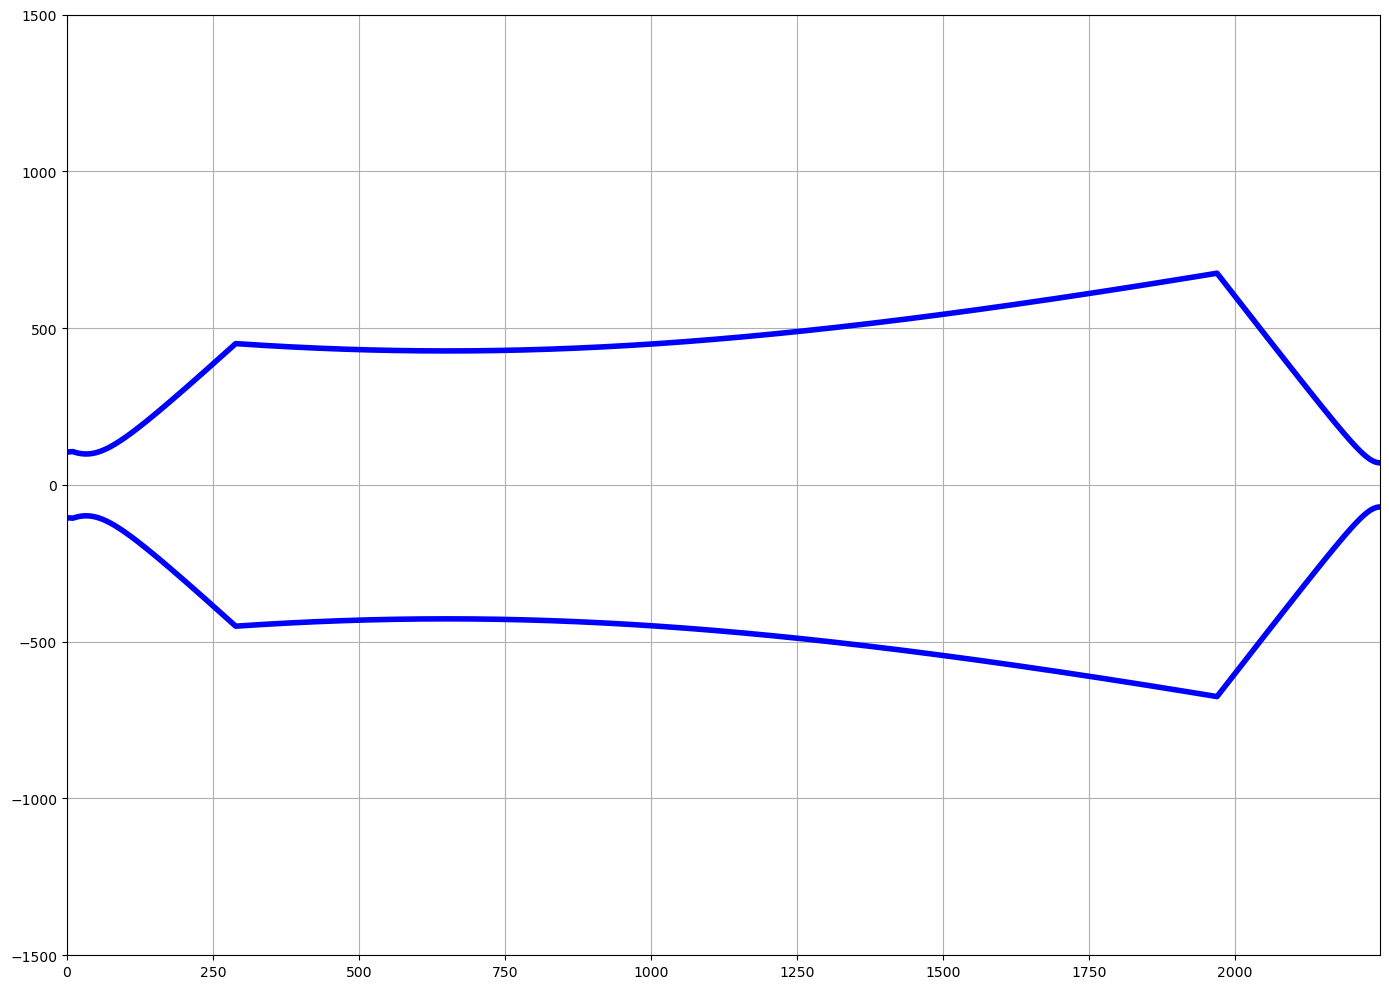

In [5]:
a = [10,120,279,250,1680,250,279]

stab, w1, w2, freq = resonator_params(a[0],a[1],a[2],a[3],a[4],a[5],a[6])

print('Stability = ',stab)
print('Beam Waist OC =' ,w1, 'um')
print('Beam Waist SAM =' ,w2, 'um')
print('Frequency =' ,freq/1e6, 'MHz')

resonator_plotter(a[0],a[1],a[2],a[3],a[4],a[5],a[6],1)

Stability =  0.2949620627572017
Beam Waist OC = 115.53344887655189 um
Beam Waist SAM = 87.15938890763557 um
Frequency = 79.57559681697613 MHz


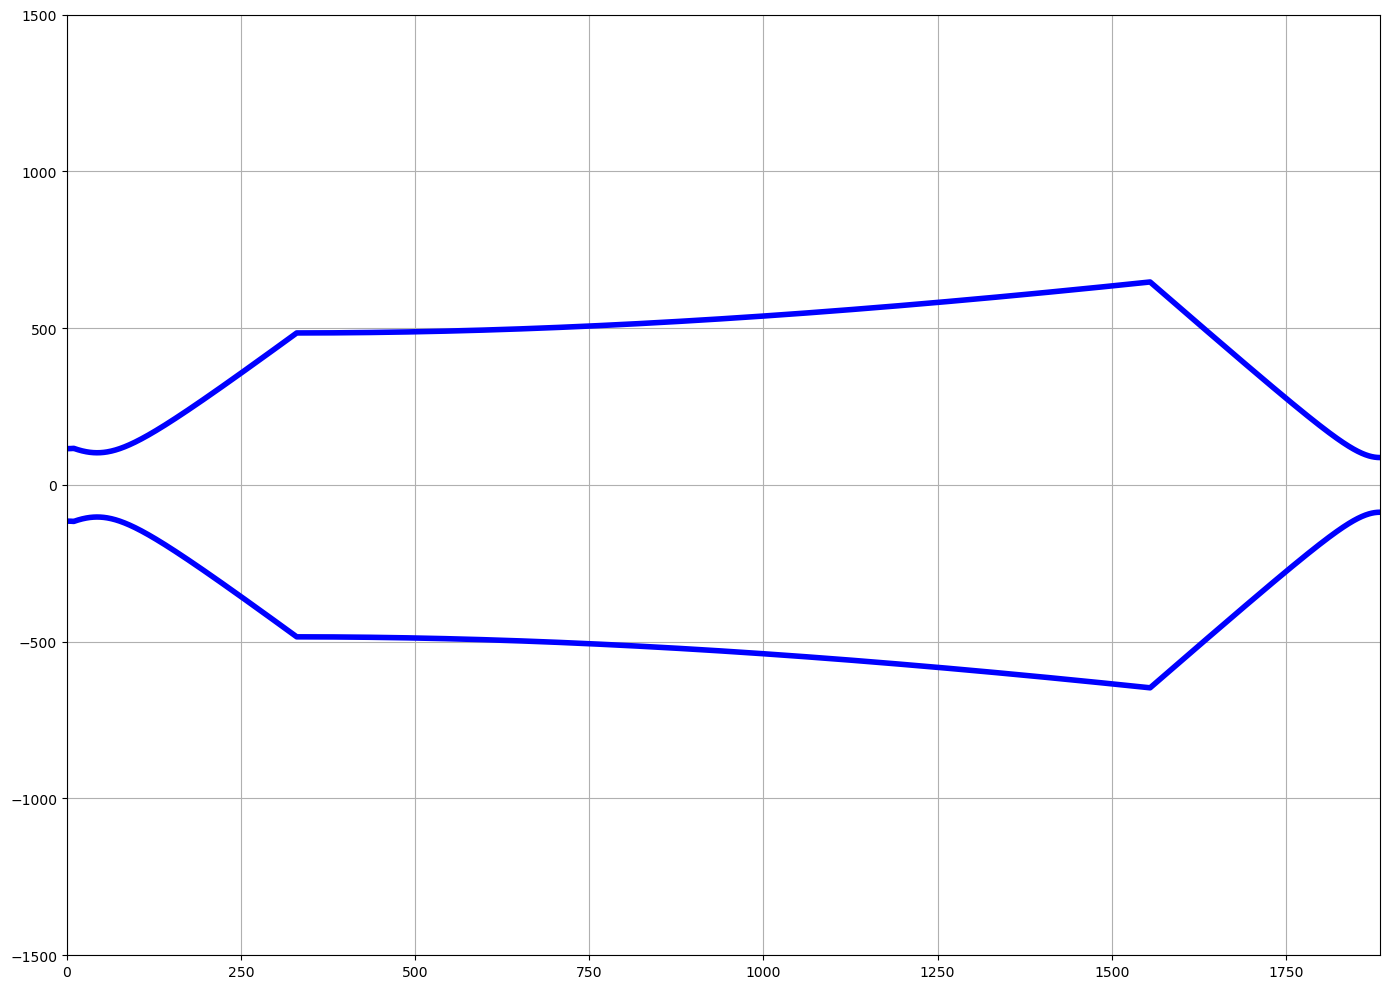

In [6]:
a = [10,120,320,300,1225,300,330]

stab, w1, w2, freq = resonator_params(a[0],a[1],a[2],a[3],a[4],a[5],a[6])

print('Stability = ',stab)
print('Beam Waist OC =' ,w1, 'um')
print('Beam Waist SAM =' ,w2, 'um')
print('Frequency =' ,freq/1e6, 'MHz')

resonator_plotter(a[0],a[1],a[2],a[3],a[4],a[5],a[6],1)

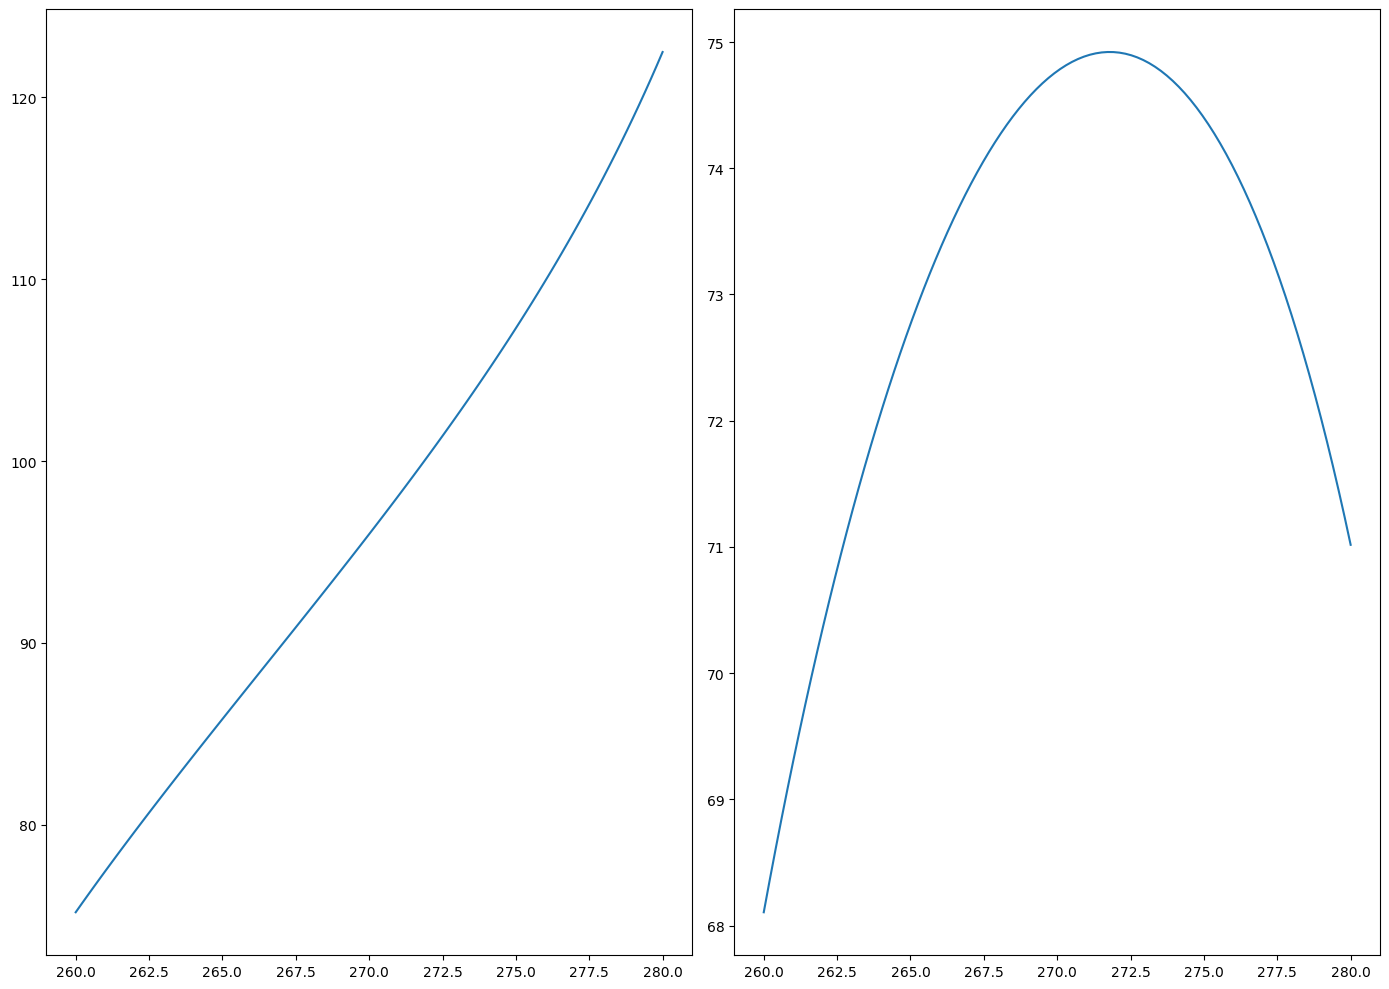

In [7]:
def f(x,y):
    return x**2 + y**2

def LasCav(L1,L2):
    stab, w1, w2, freq = resonator_params(0,120,L1,250,1325,250,L2)
    
    return stab, w1, w2

x = np.linspace(260, 280, 100)
y = np.linspace(260, 280, 100)

X, Y = np.meshgrid(x,y)
Z1, Z2, Z3 = LasCav(x,x)


fig = plt.figure(figsize=(14,10),tight_layout = True)

ax = fig.add_subplot(1,2,1)
left = plt.plot(x,Z2)


ax = fig.add_subplot(1,2,2)
right = plt.plot(x,Z3)
    
#ax = fig.add_subplot(1,3,3)
#right = plt.contour(X,Y,Z3)

plt.show()

